# inportant

In [3]:
from keras.callbacks import EarlyStopping
from keras.layers.advanced_activations import ReLU
from keras.layers.core import Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.preprocessing import QuantileTransformer
from keras.utils import np_utils


class NNClassifier:
    '''
    Usage:
    clf = NNClassifier(**params)
    history = clf.fit(
    X_train,
    y_train,
    X_valid,
    y_valid,
    early_stopping_rounds
    )
    '''
    
    def __init__(self, input_shape=1024, input_dropout=0.2, hidden_layers=1, hidden_units=64, hidden_dropout=0.2,
                 batch_norm="none", learning_rate=0.05, batch_size=64, epochs=10000):
        self.input_shape = int(input_shape) # layer param
        self.input_dropout = input_dropout # layer param
        self.hidden_layers = int(hidden_layers) # layer param
        self.hidden_units = int(hidden_units) # layer param
        self.hidden_dropout = hidden_dropout # layer param
        self.batch_norm = batch_norm # layer param
        self.learning_rate = learning_rate # optimizer param
        self.batch_size = int(batch_size) # fit param
        self.epochs = int(epochs) # fit param
        
    def fit(self, X_train, y_train, X_valid, y_valid, early_stopping_rounds):
        # Data standardization
        self.transformer = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
        X_train = self.transformer.fit_transform(X_train)
        X_valid = self.transformer.transform(X_valid)
        # layers
        self.model = Sequential()
        self.model.add(Dropout(self.input_dropout, input_shape=(self.input_shape,)))
        for i in range(self.hidden_layers):
            self.model.add(Dense(self.hidden_units))
            if self.batch_norm == 'before_act':
                self. model.add(BatchNormalization())
            else:
                raise NotImplementedError
            self.model.add(ReLU())
            self.model.add(Dropout(self.hidden_dropout))
        self.model.add(Dense(1, activation='sigmoid'))
        # Optimazer
        optimizer = Adam(lr=self.learning_rate, beta_1=0.9, beta_2=0.999, decay=0.)
        # Compile
        self.model.compile(
            loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy']
        )
        # train
        early_stopping = EarlyStopping(patience=early_stopping_rounds, restore_best_weights=True)
        self.history = self.model.fit(
            X_train,
            y_train,
            epochs=self.epochs,
            batch_size=self.batch_size,
            verbose=1,
            validation_data=(X_valid, y_valid),
            callbacks=[early_stopping]
        )
        return self.history
    
    def predict(self, x):
        x = self.transformer.transform(x)
        y_pred = self.model.predict(x)
        y_pred = y_pred.flatten()
        return y_pred

    def get_model(self):
        return self.model

Using TensorFlow backend.
/Users/kurosaki/opt/miniconda3/envs/ML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/kurosaki/opt/miniconda3/envs/ML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/kurosaki/opt/miniconda3/envs/ML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/k

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
brest_c = load_breast_cancer()
X = brest_c['data']
y = brest_c['target']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

# input_shape = X.shape[1]
# input_dropout = 0.0
# hidden_layers = 1
# hidden_units = 16
# hidden_dropout = 0.2
# batch_norm = 'before_act'
# batch_size = 10
# learning_rate = 0.05
# epochs = 10000
early_stopping_rounds = 10

params = {
    'input_shape':X.shape[1],
    "input_dropout":0.0,
    "hidden_layers":1,
    'hidden_units':16,
    'hidden_dropout':0.2,
    'batch_norm':'before_act',
    'batch_size':10,
    'learning_rate':0.05,
    'epochs':10000
}


model = NNClassifier(
    **params
#     input_shape, input_dropout, hidden_layers, hidden_units, hidden_dropout,
#                  batch_norm, learning_rate, batch_size, epochs
)
hist = model.fit(
    X_train,
    y_train,
    X_valid,
    y_valid,
    early_stopping_rounds
)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 455 samples, validate on 114 samples
Epoch 1/10000
455/455 [==============================] - 0s 761us/step - loss: 0.2831 - accuracy: 0.8835 - val_loss: 0.1131 - val_accuracy: 0.9561
Epoch 2/10000
455/455 [==============================] - 0s 145us/step - loss: 0.2707 - accuracy: 0.8879 - val_loss: 0.1316 - val_accuracy: 0.9561
Epoch 3/10000
455/455 [==============================] - 0s 137us/step - loss: 0.1738 - accuracy: 0.9319 - val_loss: 0.1280 - val_accuracy: 0.9474
Epoch 4/10000
455/455 [==============================] - 0s 126us/step - loss: 0.1862 - accuracy: 0.9143 - val_loss: 0.1255 - val_accuracy: 0.9474
Epoch 5/10000
455/455 [==============================] - 0s 127us/step - loss: 0.1964 - accuracy: 0.9253 - val_loss: 0.1408 - val_accuracy: 0.9649
Epoch 6/10000
455/455 [==============================] - 0s 125us/step - loss: 0.2443 - accuracy: 0

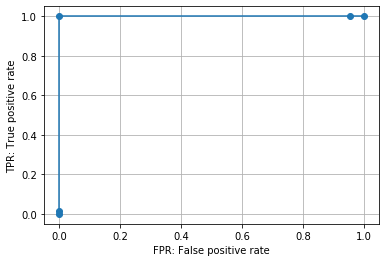

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_valid, model.predict(X_valid))
plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()

# Trainerクラスの編集

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

class Trainer:

    '''
    # Usage
    n_splits = 3
    random_state = 0
    early_stopping_rounds=10
    kf = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    for tr_idx, va_idx in kf.split(X, y):
        model = Trainer(XGBRegressor(**XGB_PARAMS))
        model.fit(
            X[tr_idx],
            y[tr_idx],
            X[va_idx],
            y[va_idx],
            early_stopping_rounds
        )
        model.get_learning_curve()
    '''

    def __init__(self, model):
        self.model = model
        self.model_type = type(model).__name__
        self.best_iteration = 100
        self.train_rmse = []
        self.valid_rmse = []
        self.importance = []

    
    def fit(self,
            X_train, y_train, X_valid, y_valid,
            early_stopping_rounds):

        eval_set = [(X_train, y_train), (X_valid, y_valid)]

        if self.model_type == "LGBMClassifier":
            self.model.fit(
                X_train,
                y_train,
                early_stopping_rounds=early_stopping_rounds,
                eval_set=eval_set,
                eval_metric='logloss',
                verbose=False
            )
            self.best_iteration = self.model.best_iteration_
            self.importance = self.model.booster_.feature_importance(
                importance_type='gain')
            self.train_logloss = np.array(
                self.model.evals_result_['training']['binary_logloss'])
            self.valid_logloss = np.array(
                self.model.evals_result_['valid_1']['binary_logloss'])
            self.importance = self.model.feature_importances_

        elif self.model_type == 'XGBClassifier':
            self.model.fit(
                X_train,
                y_train,
                early_stopping_rounds=early_stopping_rounds,
                eval_set=eval_set,
                eval_metric='logloss',
                verbose=0
            )
            self.best_iteration = self.model.best_iteration
            self.importance = self.model.feature_importances_
            self.train_logloss = np.array(
                self.model.evals_result_['validation_0']['logloss'])
            self.valid_logloss = np.array(
                self.model.evals_result_['validation_1']['logloss'])
            
        elif self.model_type == 'NNClassifier':
            self.history = self.model.fit(
                X_train,
                y_train,
                X_valid,
                y_valid,
                early_stopping_rounds
            )
            self.train_logloss = np.array(self.history.history['loss'])
            self.valid_logloss = np.array(self.history.history['val_loss'])
            

    def predict_proba(self, X):
        if self.model_type == "LGBMClassifier":
            print(print(f"model type is {self.model_type}"))
            return self.model.predict_proba(X, ntree_limit=self.best_iteration)[:,1]
        elif self.model_type == "XGBClassifier":
            print(print(f"model type is {self.model_type}"))
            return self.model.predict_proba(X, ntree_limit=self.best_iteration)
        elif self.model_type == 'NNClassifier':
            print(print(f"model type is {self.model_type}"))
            return self.model.predict(X)
        
        
    def get_model(self):
        if self.model_type == "LGBMClassifier":
            print(print(f"model type is {self.model_type}"))
            return self.model
        elif self.model_type == "XGBClassifier":
            print(print(f"model type is {self.model_type}"))
            return self.model
        elif self.model_type == 'NNClassifier':
            return self.model.get_model()

    
    def get_best_iteration(self):
        print(print(f"model type is {self.model_type}"))
        return self.best_iteration

    
    def get_importance(self):
        if self.model_type == "LGBMClassifier":
            print(print(f"model type is {self.model_type}"))
            return self.importance
        elif self.model_type == "XGBClassifier":
            print(print(f"model type is {self.model_type}"))
            return self.importance
        elif self.model_type == 'NNClassifier':
            print(print(f"model type is {self.model_type}"))
            return 'For NNClassifier, feature importance is not callable.'

        
    def get_learning_curve(self):
        palette = sns.diverging_palette(220, 20, n=2)
        width = np.arange(self.train_logloss.shape[0])
        plt.figure(figsize=(10, 7.32))
        plt.title(
            'Learning_Curve ({})'.format(self.model_type), fontsize=15)
        plt.xlabel('Iterations', fontsize=15)
        plt.ylabel('LogLoss', fontsize=15)
        plt.plot(width, self.train_logloss, label='train_logloss', color=palette[0])
        plt.plot(width, self.valid_logloss, label='valid_logloss', color=palette[1])
        plt.legend(loc='upper right', fontsize=13)
        plt.show()

def emsemble_train_and_predict(model, X_train, y_train, X_test, y_test, n_splits, early_stopping_rounds, random_state):
    '''
    Return:
    predicted value of validation set,
    and list of prediction values for the test set predicted by each K-kinds of model in the CV 
    Notaion:
    predicted value of the validation set can be use for building stacking model.
    '''
    skf = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    VA_IDXES = []
    VA_PREDS = []
    TE_PREDS = []
    for tr_idx, va_idx in skf.split(X_train, y_train):
        clf = Trainer(model)
        clf.fit(
            X_train[tr_idx],
            y_train[tr_idx],
            X_train[va_idx],
            y_train[va_idx],
            early_stopping_rounds
        )
        va_pred = clf.predict_proba(X_train[va_idx])
        te_pred = clf.predict_proba(X_test)
        VA_IDXES.append(va_idx)
        VA_PREDS.append(va_pred)
        TE_PREDS.append(te_pred)
    va_idxes = np.concatenate(VA_IDXES)
    order = np.argsort(va_idxes)
    va_preds = np.concatenate(VA_PREDS)
    va_preds = va_preds[order]
    return va_preds, TE_PREDS

In [25]:
early_stopping_rounds = 10
params = {
    'input_shape':X.shape[1],
    "input_dropout":0.0,
    "hidden_layers":1,
    'hidden_units':16,
    'hidden_dropout':0.2,
    'batch_norm':'before_act',
    'batch_size':10,
    'learning_rate':0.05,
    'epochs':10000
}

clf = Trainer(NNClassifier(**params))
clf.fit(
    X_train,
    y_train,
    X_valid,
    y_valid,
    early_stopping_rounds
)

Train on 455 samples, validate on 114 samples
Epoch 1/10000
455/455 [==============================] - 1s 1ms/step - loss: 0.2648 - accuracy: 0.9187 - val_loss: 0.1396 - val_accuracy: 0.9386
Epoch 2/10000
455/455 [==============================] - 0s 175us/step - loss: 0.2357 - accuracy: 0.8989 - val_loss: 0.1039 - val_accuracy: 0.9825
Epoch 3/10000
455/455 [==============================] - 0s 178us/step - loss: 0.2787 - accuracy: 0.8945 - val_loss: 0.1528 - val_accuracy: 0.9386
Epoch 4/10000
455/455 [==============================] - 0s 176us/step - loss: 0.2331 - accuracy: 0.9187 - val_loss: 0.1043 - val_accuracy: 0.9737
Epoch 5/10000
455/455 [==============================] - 0s 183us/step - loss: 0.2323 - accuracy: 0.9099 - val_loss: 0.1119 - val_accuracy: 0.9737
Epoch 6/10000
455/455 [==============================] - 0s 171us/step - loss: 0.2131 - accuracy: 0.9143 - val_loss: 0.0955 - val_accuracy: 0.9737
Epoch 7/10000
455/455 [==============================] - 0s 160us/step - l

In [26]:
n_splits = 3
va_preds, te_preds = emsemble_train_and_predict(
    NNClassifier(**params),
    X_train,
    y_train,
    X_valid,
    y_valid,
    n_splits,
    early_stopping_rounds,
    0
)

Train on 303 samples, validate on 152 samples
Epoch 1/10000
303/303 [==============================] - 1s 2ms/step - loss: 0.2964 - accuracy: 0.8746 - val_loss: 0.1111 - val_accuracy: 0.9803
Epoch 2/10000
303/303 [==============================] - 0s 215us/step - loss: 0.2281 - accuracy: 0.9307 - val_loss: 0.0982 - val_accuracy: 0.9803
Epoch 3/10000
303/303 [==============================] - 0s 190us/step - loss: 0.2160 - accuracy: 0.9307 - val_loss: 0.0922 - val_accuracy: 0.9803
Epoch 4/10000
303/303 [==============================] - 0s 194us/step - loss: 0.2245 - accuracy: 0.9109 - val_loss: 0.1242 - val_accuracy: 0.9539
Epoch 5/10000
303/303 [==============================] - 0s 198us/step - loss: 0.1861 - accuracy: 0.9274 - val_loss: 0.1035 - val_accuracy: 0.9803
Epoch 6/10000
303/303 [==============================] - 0s 202us/step - loss: 0.2544 - accuracy: 0.9043 - val_loss: 0.1047 - val_accuracy: 0.9868
Epoch 7/10000
303/303 [==============================] - 0s 203us/step - l

In [27]:
va_preds

array([9.9939752e-01, 9.9635774e-01, 7.3245335e-01, 9.8018730e-01,
       1.0831952e-03, 9.1372788e-01, 5.2208370e-01, 9.8131275e-01,
       6.2863052e-01, 9.9872851e-01, 9.9899238e-01, 9.9991333e-01,
       9.9936354e-01, 9.9604285e-01, 9.9929523e-01, 9.9695277e-01,
       8.9518160e-01, 0.0000000e+00, 1.4001131e-04, 9.9700677e-01,
       9.9975634e-01, 4.1947663e-02, 1.7291903e-03, 9.0502709e-02,
       9.9996567e-01, 9.9999678e-01, 1.4901161e-06, 9.9650562e-01,
       2.7200758e-02, 9.9997413e-01, 0.0000000e+00, 9.2518783e-01,
       9.8553681e-01, 0.0000000e+00, 7.2525293e-02, 9.9759173e-01,
       4.6491623e-06, 9.9902725e-01, 5.9306622e-06, 6.7013097e-01,
       2.9953808e-02, 8.3833075e-01, 9.9380589e-01, 5.2216649e-04,
       1.4558941e-02, 2.9015243e-03, 1.4519691e-04, 9.9914378e-01,
       9.9908698e-01, 7.9401338e-01, 9.9964738e-01, 9.9312800e-01,
       9.7000420e-01, 9.9995935e-01, 2.4276972e-04, 2.6527375e-02,
       9.9976254e-01, 8.8900971e-01, 9.9964678e-01, 9.9970353e

In [28]:
te_preds

[array([9.9766445e-01, 2.8642982e-02, 9.9193466e-01, 2.0707506e-01,
        9.9584126e-01, 9.9788892e-01, 1.0357848e-01, 9.9871743e-01,
        9.9335301e-01, 9.9122167e-01, 5.9604645e-08, 9.9999309e-01,
        9.8170662e-01, 3.2693148e-05, 9.9923652e-01, 9.9805343e-01,
        9.9922442e-01, 3.5530329e-04, 4.5973432e-01, 9.3093097e-01,
        9.9974835e-01, 9.9789864e-01, 2.0413667e-02, 9.9798346e-01,
        9.9914622e-01, 9.9941039e-01, 7.4997902e-02, 9.9929947e-01,
        3.3556253e-02, 2.1959990e-02, 9.9539334e-01, 9.9916494e-01,
        1.0607016e-01, 3.7323207e-02, 9.9859583e-01, 3.5461485e-03,
        9.9955219e-01, 6.9735026e-01, 9.9487090e-01, 9.9680740e-01,
        9.8089105e-01, 9.9990767e-01, 9.0589136e-01, 9.6353555e-01,
        9.9967366e-01, 3.7421286e-03, 1.0162592e-05, 9.9304187e-01,
        9.1607273e-01, 9.0649223e-01, 9.9259216e-01, 5.5700541e-05,
        7.1585178e-05, 9.9949414e-01, 9.9970305e-01, 9.6469176e-01,
        1.9647002e-02, 8.6517912e-01, 7.7208102e

In [23]:
clf.get_best_iteration()

model type is NNClassifier
None


100

In [24]:
clf.get_importance()

model type is NNClassifier
None


'For NNClassifier, feature importance is not callable.'

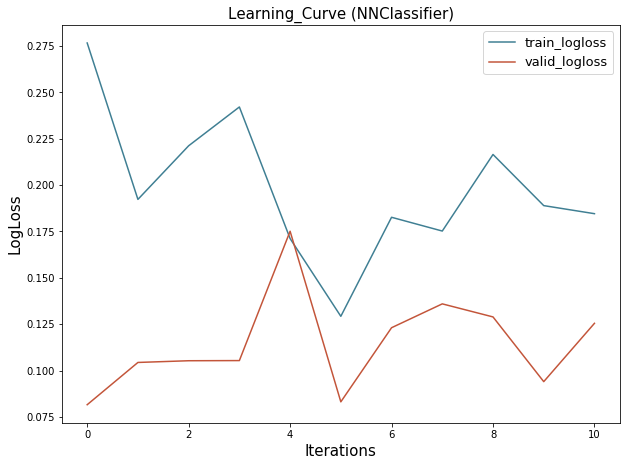

In [25]:
clf.get_learning_curve()

In [26]:
m = clf.get_model()
m.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_7 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                496       
_________________________________________________________________
batch_normalization_4 (Batch (None, 16)                64        
_________________________________________________________________
re_lu_4 (ReLU)               (None, 16)                0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 577
Trainable params: 545
Non-trainable params: 32
_______________________________________________________

In [28]:
clf.history.history[]

{'val_loss': [0.08158592647350017,
  0.10436565004975389,
  0.10528957497393876,
  0.10537468772708324,
  0.1750935291454784,
  0.08313599774785536,
  0.12308569013941706,
  0.13594471521495857,
  0.12890344493810021,
  0.09402357361671564,
  0.12546090876454846],
 'val_accuracy': [0.9473684430122375,
  0.9736841917037964,
  0.9649122953414917,
  0.9736841917037964,
  0.9385964870452881,
  0.9736841917037964,
  0.9561403393745422,
  0.9561403393745422,
  0.9736841917037964,
  0.9736841917037964,
  0.9649122953414917],
 'loss': [0.2765693956842789,
  0.19225488277663896,
  0.22115275202380433,
  0.24207175482105422,
  0.17114570583370362,
  0.12923548758480247,
  0.18261174501462296,
  0.17519613216211508,
  0.2164686496809616,
  0.18890566833235406,
  0.18455428111233882],
 'accuracy': [0.8945055,
  0.93186814,
  0.9208791,
  0.9076923,
  0.93626374,
  0.94945055,
  0.93186814,
  0.94065934,
  0.9230769,
  0.93846154,
  0.94065934]}